# Part 1: Pytorch Tutorial

Modifed from the official tutorial: https://pytorch.org/tutorials/beginner/basics/intro.html

In [ ]:
# Install the packages:
!pip install torch torchvision

## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. 

Tensors are also optimized for automatic differentiation (we'll see more about that later in the **Autograd
section**).

In [2]:
import torch
import numpy as np

### 1.1 Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).



In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7284, 0.8611],
        [0.3077, 0.3591]]) 


**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6223, 0.1529, 0.2736],
        [0.7432, 0.0438, 0.4213]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2 Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1.3 Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [9]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** 

You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining operator that is subtly different from ``torch.cat``.



In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Arithmetic operations**



In [13]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T

y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

y3

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [14]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor

z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

z3

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**Tensor to Numerical value** 

If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [18]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

92.0 <class 'float'>


**In-place operations**


Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.</p></div>

In [17]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])



### 1.4 Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



### Tensor to NumPy array



In [16]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor



In [19]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2. Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: [Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[Text Datasets](https://pytorch.org/text/stable/datasets.html), and
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)




### 2.1 Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

In [21]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 2.2 Iterating and Visualizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.

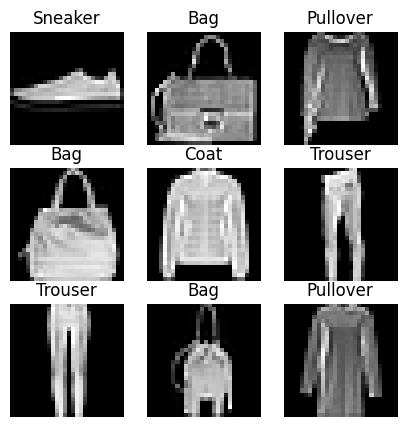

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2.3 DataLoader
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


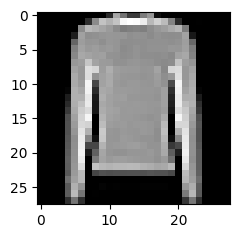

Label: 2


In [27]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(img, cmap="grey")
plt.show()
print(f"Label: {label}")

## 3. Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data.
The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to
build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

In [28]:
import os
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU or MPS,
if available. Let's check to see if [torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html)
or [torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) are available, otherwise we use the CPU.

In [29]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


### 3.2 Define the Model
We define our neural network by subclassing ``nn.Module``, and
initialize the neural network layers in ``__init__``. Every ``nn.Module`` subclass implements
the operations on input data in the ``forward`` method.

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of ``NeuralNetwork``, and move it to the ``device``, and print
its structure.

In [32]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model's ``forward``,
along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call ``model.forward()`` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output.
We get the prediction probabilities by passing it through an instance of the ``nn.Softmax`` module.



In [33]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8], device='cuda:0')


### 3.3 Model Layers

Let's break down the layers in the model. To illustrate it, we
will take a sample minibatch of 3 images of size 28x28 and see what happens to it as
we pass it through the network.



In [34]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten
We initialize the [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (
the minibatch dimension (at dim=0) is maintained).



In [35]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear
The [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its stored weights and biases.




In [36]:
layer1 = nn.Linear(in_features=784, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU
Non-linear activations are what create the complex mappings between the model's inputs and outputs.
They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) between our
linear layers, but there's other activations to introduce non-linearity in your model.



In [37]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3486,  0.3143,  0.4752,  0.2239, -0.3579, -0.0044,  0.1958, -0.0472,
         -0.1745, -0.0357,  0.4050, -0.6057,  0.2287, -0.2568,  0.2097,  0.7570,
          0.4486, -0.0344, -0.1840, -0.1442],
        [ 0.0659,  0.4882,  0.4838,  0.5490, -0.5255,  0.5314, -0.2983, -0.2924,
         -0.0275,  0.2360, -0.3357, -0.3960, -0.1659, -0.4229,  0.1855,  0.7961,
          0.3848, -0.1403, -0.0472, -0.0035],
        [-0.1609,  0.8697,  0.5573,  0.6484, -0.1698,  0.2103, -0.0971, -0.5096,
          0.2671, -0.2550,  0.0251, -0.5238,  0.2735, -0.1673,  0.0925,  0.7170,
          0.0510,  0.0529, -0.2946, -0.1282]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3486, 0.3143, 0.4752, 0.2239, 0.0000, 0.0000, 0.1958, 0.0000, 0.0000,
         0.0000, 0.4050, 0.0000, 0.2287, 0.0000, 0.2097, 0.7570, 0.4486, 0.0000,
         0.0000, 0.0000],
        [0.0659, 0.4882, 0.4838, 0.5490, 0.0000, 0.5314, 0.0000, 0.0000, 0.0000,
         0.2360, 0.0000, 0.0000, 0.0000, 0.0000, 0.18

### nn.Sequential
[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like ``seq_modules``.



In [38]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax
The last linear layer of the neural network returns `logits` - raw values in [-\infty, \infty] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) module. The logits are scaled to values
[0, 1] representing the model's predicted probabilities for each class. ``dim`` parameter indicates the dimension along
which the values must sum to 1.



In [39]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(pred_probab)

tensor([[0.0812, 0.0968, 0.0905, 0.1099, 0.1298, 0.0748, 0.1007, 0.0926, 0.0900,
         0.1337],
        [0.0913, 0.0853, 0.1036, 0.1119, 0.1148, 0.0781, 0.1051, 0.0952, 0.0928,
         0.1221],
        [0.0860, 0.1050, 0.0944, 0.1003, 0.1304, 0.0705, 0.1014, 0.1077, 0.0862,
         0.1183]], grad_fn=<SoftmaxBackward0>)


## 4. Automatic Differentiation with ``torch.autograd``

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine
called ``torch.autograd``. It supports automatic computation of gradient for any
computational graph.

Consider the simplest one-layer neural network, with input ``x``,
parameters ``w`` and ``b``, and some loss function. It can be defined in
PyTorch in the following manner:


In [40]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Tensors, Functions and Computational graph

This code defines the following **computational graph**:

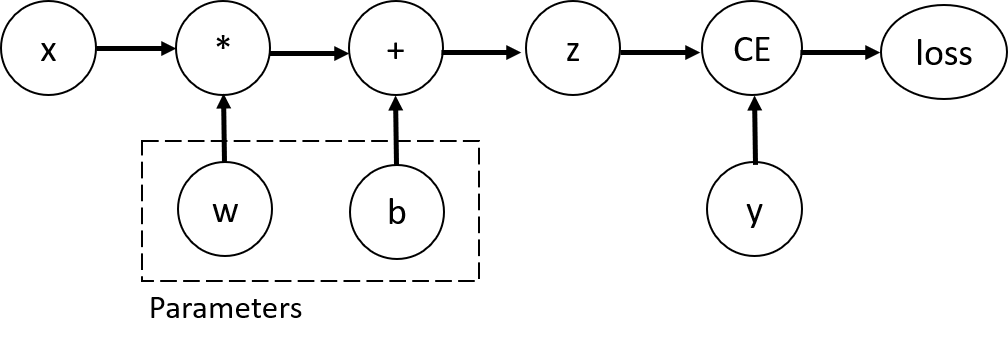

In this network, ``w`` and ``b`` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the ``requires_grad`` property of those tensors.



<div class="alert alert-info"><h4>Note</h4><p>You can set the value of ``requires_grad`` when creating a
          tensor, or later by using ``x.requires_grad_(True)`` method.</p></div>



A function that we apply to tensors to construct computational graph is
in fact an object of class ``Function``. This object knows how to
compute the function in the *forward* direction, and also how to compute
its derivative during the *backward propagation* step. A reference to
the backward propagation function is stored in ``grad_fn`` property of a
tensor. You can find more information of ``Function`` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function)_.




In [45]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x00000207C7043550>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000207C6E9C3D0>


### Computing Gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:




In [1]:
loss.backward()
print(w.grad)
print(b.grad)

NameError: name 'loss' is not defined

<div class="alert alert-info"><h4>Note</h4><p>- We can only obtain the ``grad`` properties for the leaf
    nodes of the computational graph, which have ``requires_grad`` property
    set to ``True``. For all other nodes in our graph, gradients will not be
    available.
  - We can only perform gradient calculations using
    ``backward`` once on a given graph, for performance reasons. If we need
    to do several ``backward`` calls on the same graph, we need to pass
    ``retain_graph=True`` to the ``backward`` call.</p></div>




## 5. Optimizing Model Parameters

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on
our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates
the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in
the [previous section](autograd_tutorial.html)), and **optimizes** these parameters using gradient descent. For a more
detailed walkthrough of this process, check out this video on [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8)_.

### 5.1 Prerequisite Code
We load the code from the previous sections on [Datasets & DataLoaders](data_tutorial.html)
and [Build Model](buildmodel_tutorial.html).

In [47]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### 5.2 Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process.
Different hyperparameter values can impact model training and convergence rates
([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)_ about hyperparameter tuning)

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples propagated through the network before the parameters are updated
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.




In [48]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### 5.3 Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each
iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to
see the `full-impl-label` of the optimization loop.

### 5.4 Loss Function

When presented with some training data, our untrained network is likely not to give the correct
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value,
and it is the loss function that we want to minimize during training. To calculate the loss we make a
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines ``nn.LogSoftmax`` and ``nn.NLLLoss``.

We pass our model's output logits to ``nn.CrossEntropyLoss``, which will normalize the logits and compute the prediction error.



In [49]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### 5.5 Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many [different optimizers](https://pytorch.org/docs/stable/optim.html)
available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.



In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call ``optimizer.zero_grad()`` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Backpropagate the prediction loss with a call to ``loss.backward()``. PyTorch deposits the gradients of the loss w.r.t. each parameter.
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.




### Full Implementation
We define ``train_loop`` that loops over our optimization code, and ``test_loop`` that
evaluates the model's performance against our test data.



In [51]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to ``train_loop`` and ``test_loop``.
Feel free to increase the number of epochs to track the model's improving performance.



In [52]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.294116  [   64/60000]
loss: 2.278400  [ 6464/60000]
loss: 2.263747  [12864/60000]
loss: 2.265650  [19264/60000]
loss: 2.252224  [25664/60000]
loss: 2.213036  [32064/60000]
loss: 2.226003  [38464/60000]
loss: 2.198802  [44864/60000]
loss: 2.187539  [51264/60000]
loss: 2.162157  [57664/60000]
Test Error: 
 Accuracy: 37.9%, Avg loss: 2.149978 

Epoch 2
-------------------------------
loss: 2.158343  [   64/60000]
loss: 2.143317  [ 6464/60000]
loss: 2.090207  [12864/60000]
loss: 2.114979  [19264/60000]
loss: 2.068841  [25664/60000]
loss: 1.995074  [32064/60000]
loss: 2.028314  [38464/60000]
loss: 1.961780  [44864/60000]
loss: 1.959842  [51264/60000]
loss: 1.891128  [57664/60000]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.882654 

Epoch 3
-------------------------------
loss: 1.916867  [   64/60000]
loss: 1.878416  [ 6464/60000]
loss: 1.766337  [12864/60000]
loss: 1.817165  [19264/60000]
loss: 1.703338  [25664/60000]
loss: 1.649631  [32064/600

# Part 2. A qucik start with the Moon Data

In this part, we build a neural network with the Moon Data.

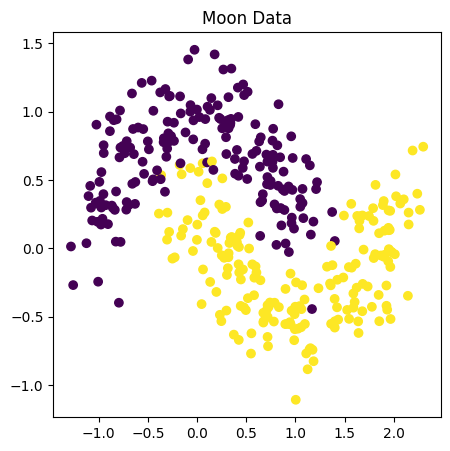

In [53]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

np.random.seed(0)
torch.manual_seed(0)
X, Y = make_moons(500, noise=0.2)

# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.25, random_state=73)       
    
#plot the data
plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.title('Moon Data')
plt.show()

### Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU or MPS,
if available. Let's check to see if [torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html)
or [torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) are available, otherwise we use the CPU.

In [54]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


### Define the model

In [55]:
import torch
from torch import nn, optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Convert data to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Train the model

Epoch: 0, Loss: 0.705367922782898, Accuracy: 0.88
Epoch: 100, Loss: 0.08316408842802048, Accuracy: 0.928
Epoch: 200, Loss: 0.056494999676942825, Accuracy: 0.944
Epoch: 300, Loss: 0.05024513602256775, Accuracy: 0.944
Epoch: 400, Loss: 0.0480816513299942, Accuracy: 0.944
Epoch: 500, Loss: 0.04683295264840126, Accuracy: 0.936
Epoch: 600, Loss: 0.04600544273853302, Accuracy: 0.936
Epoch: 700, Loss: 0.0451601967215538, Accuracy: 0.936
Epoch: 800, Loss: 0.04450656473636627, Accuracy: 0.936
Epoch: 900, Loss: 0.04381217807531357, Accuracy: 0.936


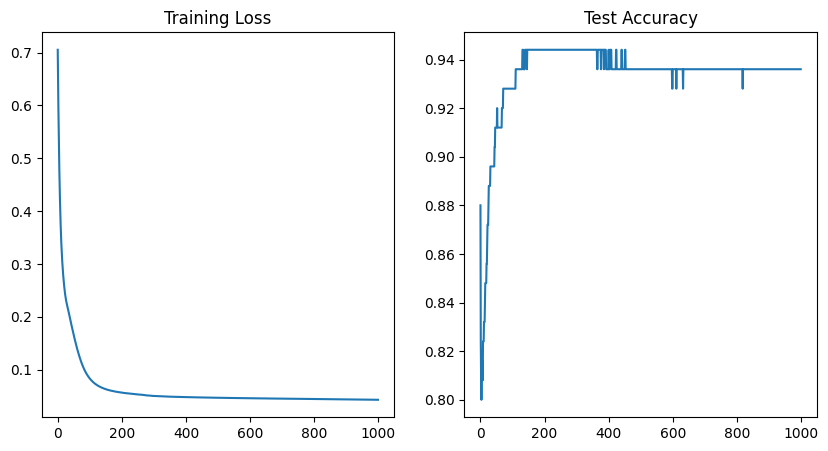

In [58]:
# Convert data to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)  # First fully connected layer, 2 input neurons (features), 50 output neurons
        self.fc2 = nn.Linear(50, 2)  # Second fully connected layer, 50 input neurons, 2 output neurons (classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation function after first layer
        x = self.fc2(x)  # Output layer
        return x

# Initialize the model and define loss and optimizer
model = Net().to(device)  # Initialize the model and move it to GPU if available
criterion = nn.CrossEntropyLoss()  # Define the loss function (Cross Entropy Loss)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Define the optimizer (Adam)

# For storing losses and accuracies for each epoch
losses = []
accuracies = []

# Training loop
for epoch in range(1000):  # Loop over the dataset multiple times
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the parameter gradients
    out = model(X_train.to(device))  # Forward pass: Compute predicted y by passing x to the model
    loss = criterion(out, Y_train.to(device))  # Compute loss: Calculate the error (CrossEntropyLoss)
    losses.append(loss.item())  # Store the loss for this epoch
    loss.backward()  # Backward pass: Compute gradient of the loss with respect to model parameters
    optimizer.step()  # Perform a single optimization step (parameter update)

    model.eval()  # Set model to evaluation mode for testing
    test_out = model(X_test.to(device))  # Forward pass on the test data
    preds = torch.argmax(test_out, axis=1)  # Get predictions from the maximum value
    accuracy = accuracy_score(Y_test.cpu(), preds.cpu())  # Calculate the accuracy for this epoch
    accuracies.append(accuracy)  # Store the accuracy for this epoch

    if epoch % 100 == 0:  
        print(f"Epoch: {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}")  # Print loss & accuracy for every 100th epoch

# Plotting loss and accuracy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(losses)   # Plot training loss over epochs
plt.title('Training Loss')
plt.subplot(1, 2, 2)
plt.plot(accuracies)   # Plot test accuracy over epochs
plt.title('Test Accuracy')
plt.show()

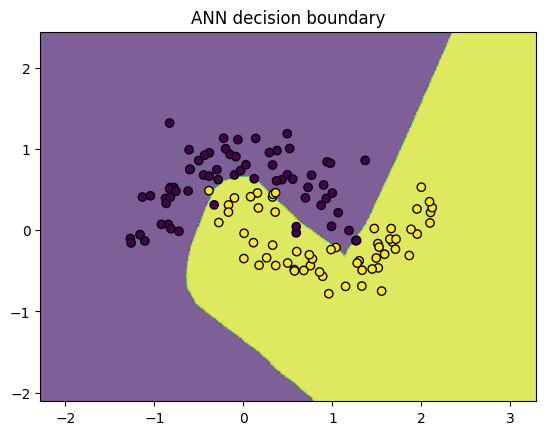

In [59]:
import numpy as np

# Create a grid of points to classify
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Put the model in evaluation mode
model.eval()

# Predicting on all the points in grid
grid_points = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
preds = model(grid_points)
_, predictions_grid = torch.max(preds.data, 1)

predictions_grid = predictions_grid.cpu().numpy().reshape(xx.shape)

# Plotting the grid of x, y points colored by predictions
plt.contourf(xx, yy, predictions_grid, alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k')
plt.title('ANN decision boundary')
plt.show()


# Part 3. Exersise 2: MNIST

Remember the MNIST dataset? Now let's apply an ANN model on the MNIST dataset. 

- Define the network architecture, the loss function and optimizer.
- Train the model and record the train loss, test loss and test accuracy.
- Try to achieve at least 90% accuracy.

The code to load the data:

In [60]:
import matplotlib.pyplot as plt
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# Load training data and labels
train_data = load_mnist_images('MNIST/train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('MNIST/train-labels-idx1-ubyte.gz')

# Load testing data and labels
test_data = load_mnist_images('MNIST/t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('MNIST/t10k-labels-idx1-ubyte.gz')

# Initialize a list to store the indices of each class
class_indices = [[] for _ in range(10)]

# Iterate through the labels and store the indices of each class
for i, label in enumerate(test_labels):
    class_indices[label].append(i)

# Plot 10 examples from each class
fig, axs = plt.subplots(10, 10, figsize=(5, 5))
for i in range(10):
    for j in range(10):
        index = class_indices[i][j]
        axs[i, j].imshow(test_data[index], cmap='gray')
        axs[i, j].axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST/train-images-idx3-ubyte.gz'

Your answers here:

Example code:

In [61]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

# Set the random seed
torch.manual_seed(0)

# Convert the numpy arrays into PyTorch tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.Tensor(train_labels)
test_data_tensor = torch.Tensor(test_data)
test_labels_tensor = torch.Tensor(test_labels)

# Create dataloaders
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Define the network architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


epochs = 5
for e in range(epochs):
    # Training
    running_loss = 0
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels.long())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Testing
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in test_loader:
            log_ps = model(images)
            test_loss += criterion(log_ps, labels.long())
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape).long()
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    print(f"Epoch {e+1}/{epochs} - Training loss: {running_loss/len(train_loader)} - Test loss: {test_loss/len(test_loader)} - Test accuracy: {accuracy/len(test_loader)}")

NameError: name 'train_data' is not defined

# The template for Assignment 6

In [63]:
import os
import pandas as pd

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X

X_public, y_public = read_data_from_csv('assignment_6_public.csv')
print('Shape of X_public:', X_public.shape)  # n_sample, m_feature (20000, 23)
print('Shape of y_public:', y_public.shape)  # n_sample (20000,)

'''
CODE HERE!
'''

X_private = read_data_from_csv('assignment_6_private.csv')
print('Shape of X_private:', X_private.shape)  # k_sample, m_feature (5000, 23)

import numpy as np

# remove and make your own predictions.
preds = np.full(len(X_private), -1,
                dtype=int)
'''
CODE HERE!
e.g.,
preds = np.full(len(X_private), -1, dtype=int)
'''

submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_6.csv', index=True, index_label='Id')

Shape of X_public: (20000, 23)
Shape of y_public: (20000,)
Shape of X_private: (5000, 23)
